In [1]:
import sys; sys.path.append('../..')
from abslithist import *

In [2]:
def to_period(y):
    if y<1600: return None#'<C17'
    if y>=2000: return None
    return to_cent(y)

In [3]:
tiltplotfn='../../data/scores/tilt.scores.fig.ft'
# !rm $tiltplotfn
if not os.path.exists(tiltplotfn):
    # loading
    dfall=pd.read_feather('../../data/scores/tilt.scores.ft')
    # dfq=dfall.dropna().query('1600<=year<2000')
    dfq=dfall.dropna()
    dfq['period']=dfq.year.parallel_apply(to_period)
    dfq=dfq.dropna().reset_index()
    dfq.to_feather(tiltplotfn)
else:
    dfq=pd.read_feather(tiltplotfn)
dfq

,index,year,score,period
0,0,1958,-0.248989,C20
1,1,1958,-0.248989,C20
2,2,1958,-0.248989,C20
3,3,1958,-0.248989,C20
4,4,1958,-0.248989,C20
...,...,...,...,...
45143022,47840521,1611,-1.091945,C17
45143023,47840522,1611,1.655414,C17
45143024,47840523,1611,0.806341,C17
45143025,47840525,1611,1.193068,C17


In [4]:
dashd={
    'C17':'dotted',
    'C18':'dashed',
    'C19':'dashdot',
    'C20':'solid'
}

In [34]:
def xy_peaks(figdf,group='period',x='score',n=10000):
    # label peaks
    o={}
    for period in tqdm(list(set(figdf[group]))):
        vals=figdf[figdf.period==period][x].dropna().sample(n=n,replace=True)
        o[period]=(vals.median(), get_density_peak(vals))
    return o

In [35]:
# xyanno=xy_peaks(dfq)
# xyanno

In [41]:
# filter
def plot_mega_density(dfq,x='mean',group='period',fig=None,n=1000,runs=1,xyanno={}):
    import plotnine as p9
    for nrun in tqdm(list(range(runs)),desc='Running through runs'):
#     for nrun in range(runs):
        figdf=dfq.groupby(group).sample(n=n,replace=True)
        if fig is None:
            xyanno=xy_peaks(figdf)
            
            p9.options.dpi=300
            p9.options.figure_size=(9,6)
            fig = p9.ggplot(
                p9.aes(
                    x=x,
                    group=group,
#                     color=group,
#                     fill=group,
                    linetype=group
                ),
                data=figdf
            )
            fig+=p9.theme_classic()
            fig+=p9.scale_linetype_manual(dashd)
            fig+=p9.scale_color_gray()
            fig+=p9.scale_fill_gray(alpha=0.5)
            fig+=p9.geom_vline(xintercept=0)
            
#             # label peaks
            maxpeak=max(y for x,y in xyanno.values())
            for period,(x,y) in xyanno.items():
                fig+=p9.geom_vline(xintercept=x, alpha=0.5)
                fig+=p9.geom_text(x=x, y=maxpeak, label=period, size=10)
                
        
        fig+=p9.geom_density(alpha=0.25,data=figdf,size=1.111)
    
#     return fig

    fig.save('../../figures/tilt.plot.canonfic.v3.png')
    return fig

Running through runs: 100%|██████████| 1/1 [00:08<00:00,  8.61s/it]


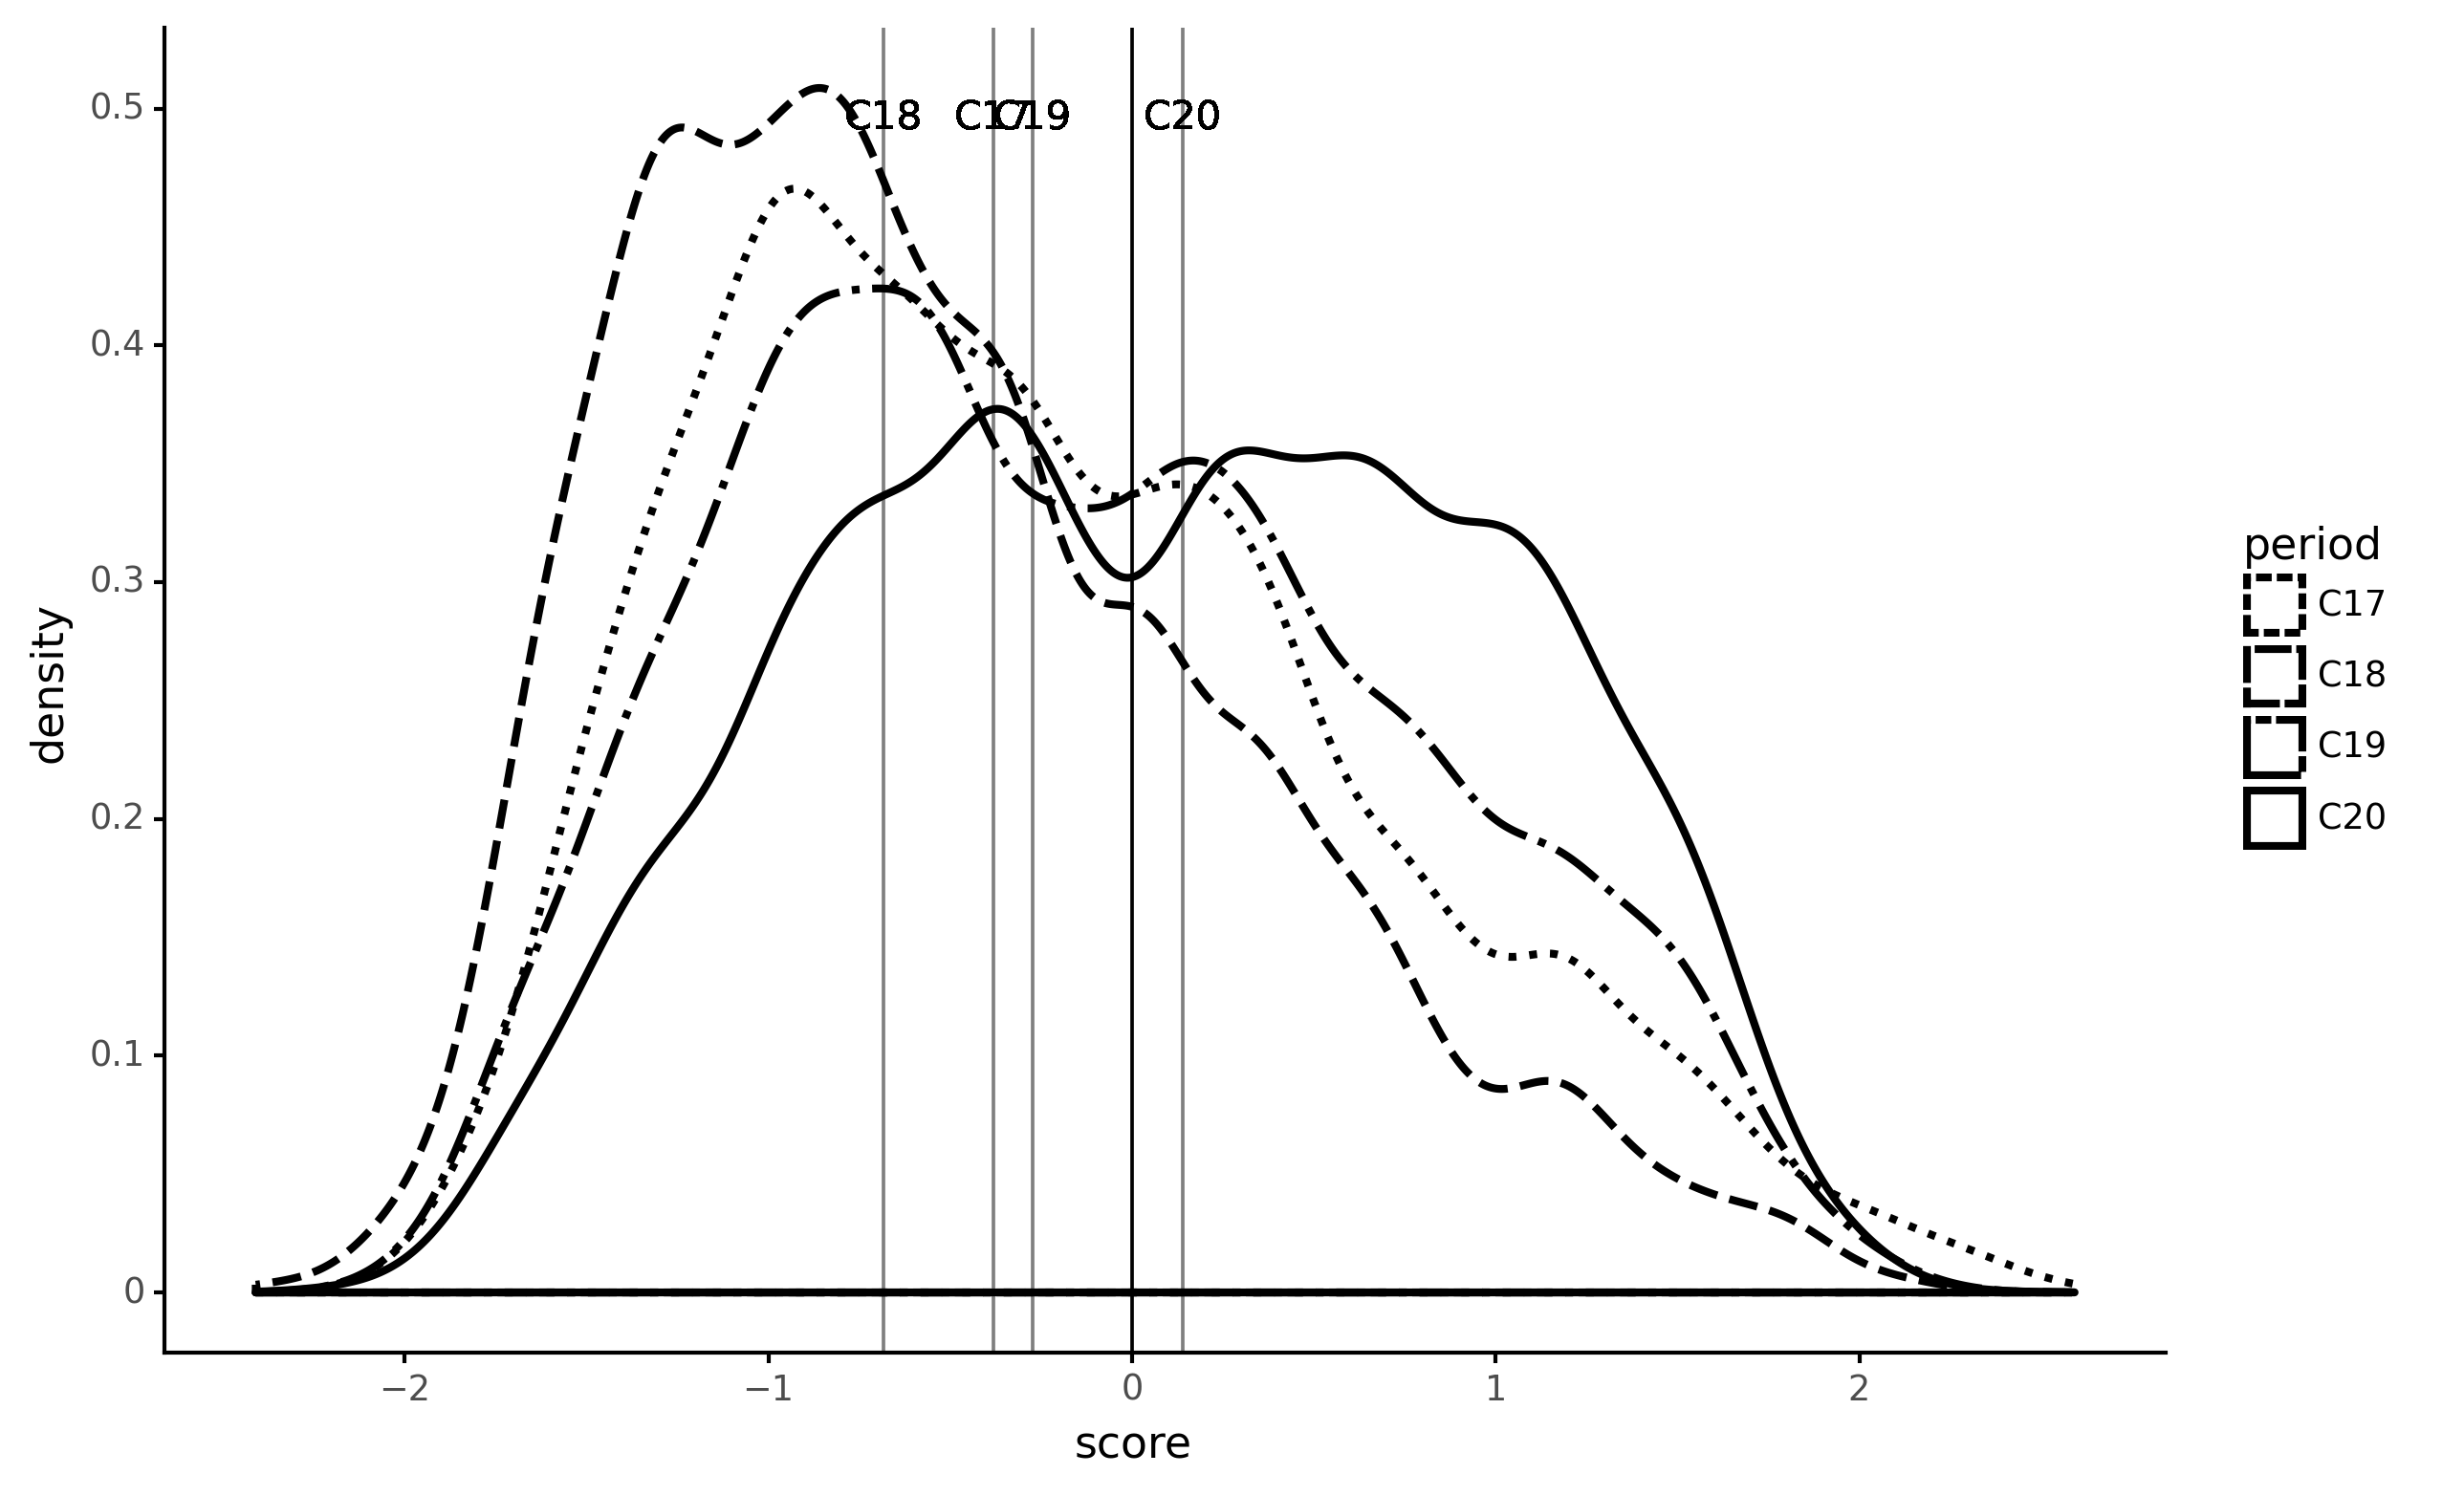

<ggplot: (8738068815145)>

In [42]:
fig=plot_mega_density(dfq, x='score', n=10000, runs=1)
fig

In [15]:
# filter
def plot_mega_density_facet(dfq,x='mean',group='period',fig=None,n=1000,runs=1):
    import plotnine as p9
    for nrun in tqdm(list(range(runs)),desc='Running through runs'):
#     for nrun in range(runs):
        figdf=dfq.groupby(group).sample(n=n,replace=True)
        if fig is None:
            p9.options.dpi=300
            p9.options.figure_size=(9,9)
            fig = p9.ggplot(
                p9.aes(
                    x=x,
                    group=group,
                ),
                data=figdf
            )
            fig+=p9.theme_classic()
            fig+=p9.scale_linetype_manual(dashd)
            fig+=p9.geom_vline(xintercept=0)
            fig+=p9.facet_wrap(group,nrow=4)
            
            
            
        fig+=p9.geom_density(alpha=0.25,data=figdf,size=1)
    return fig

Running through runs: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


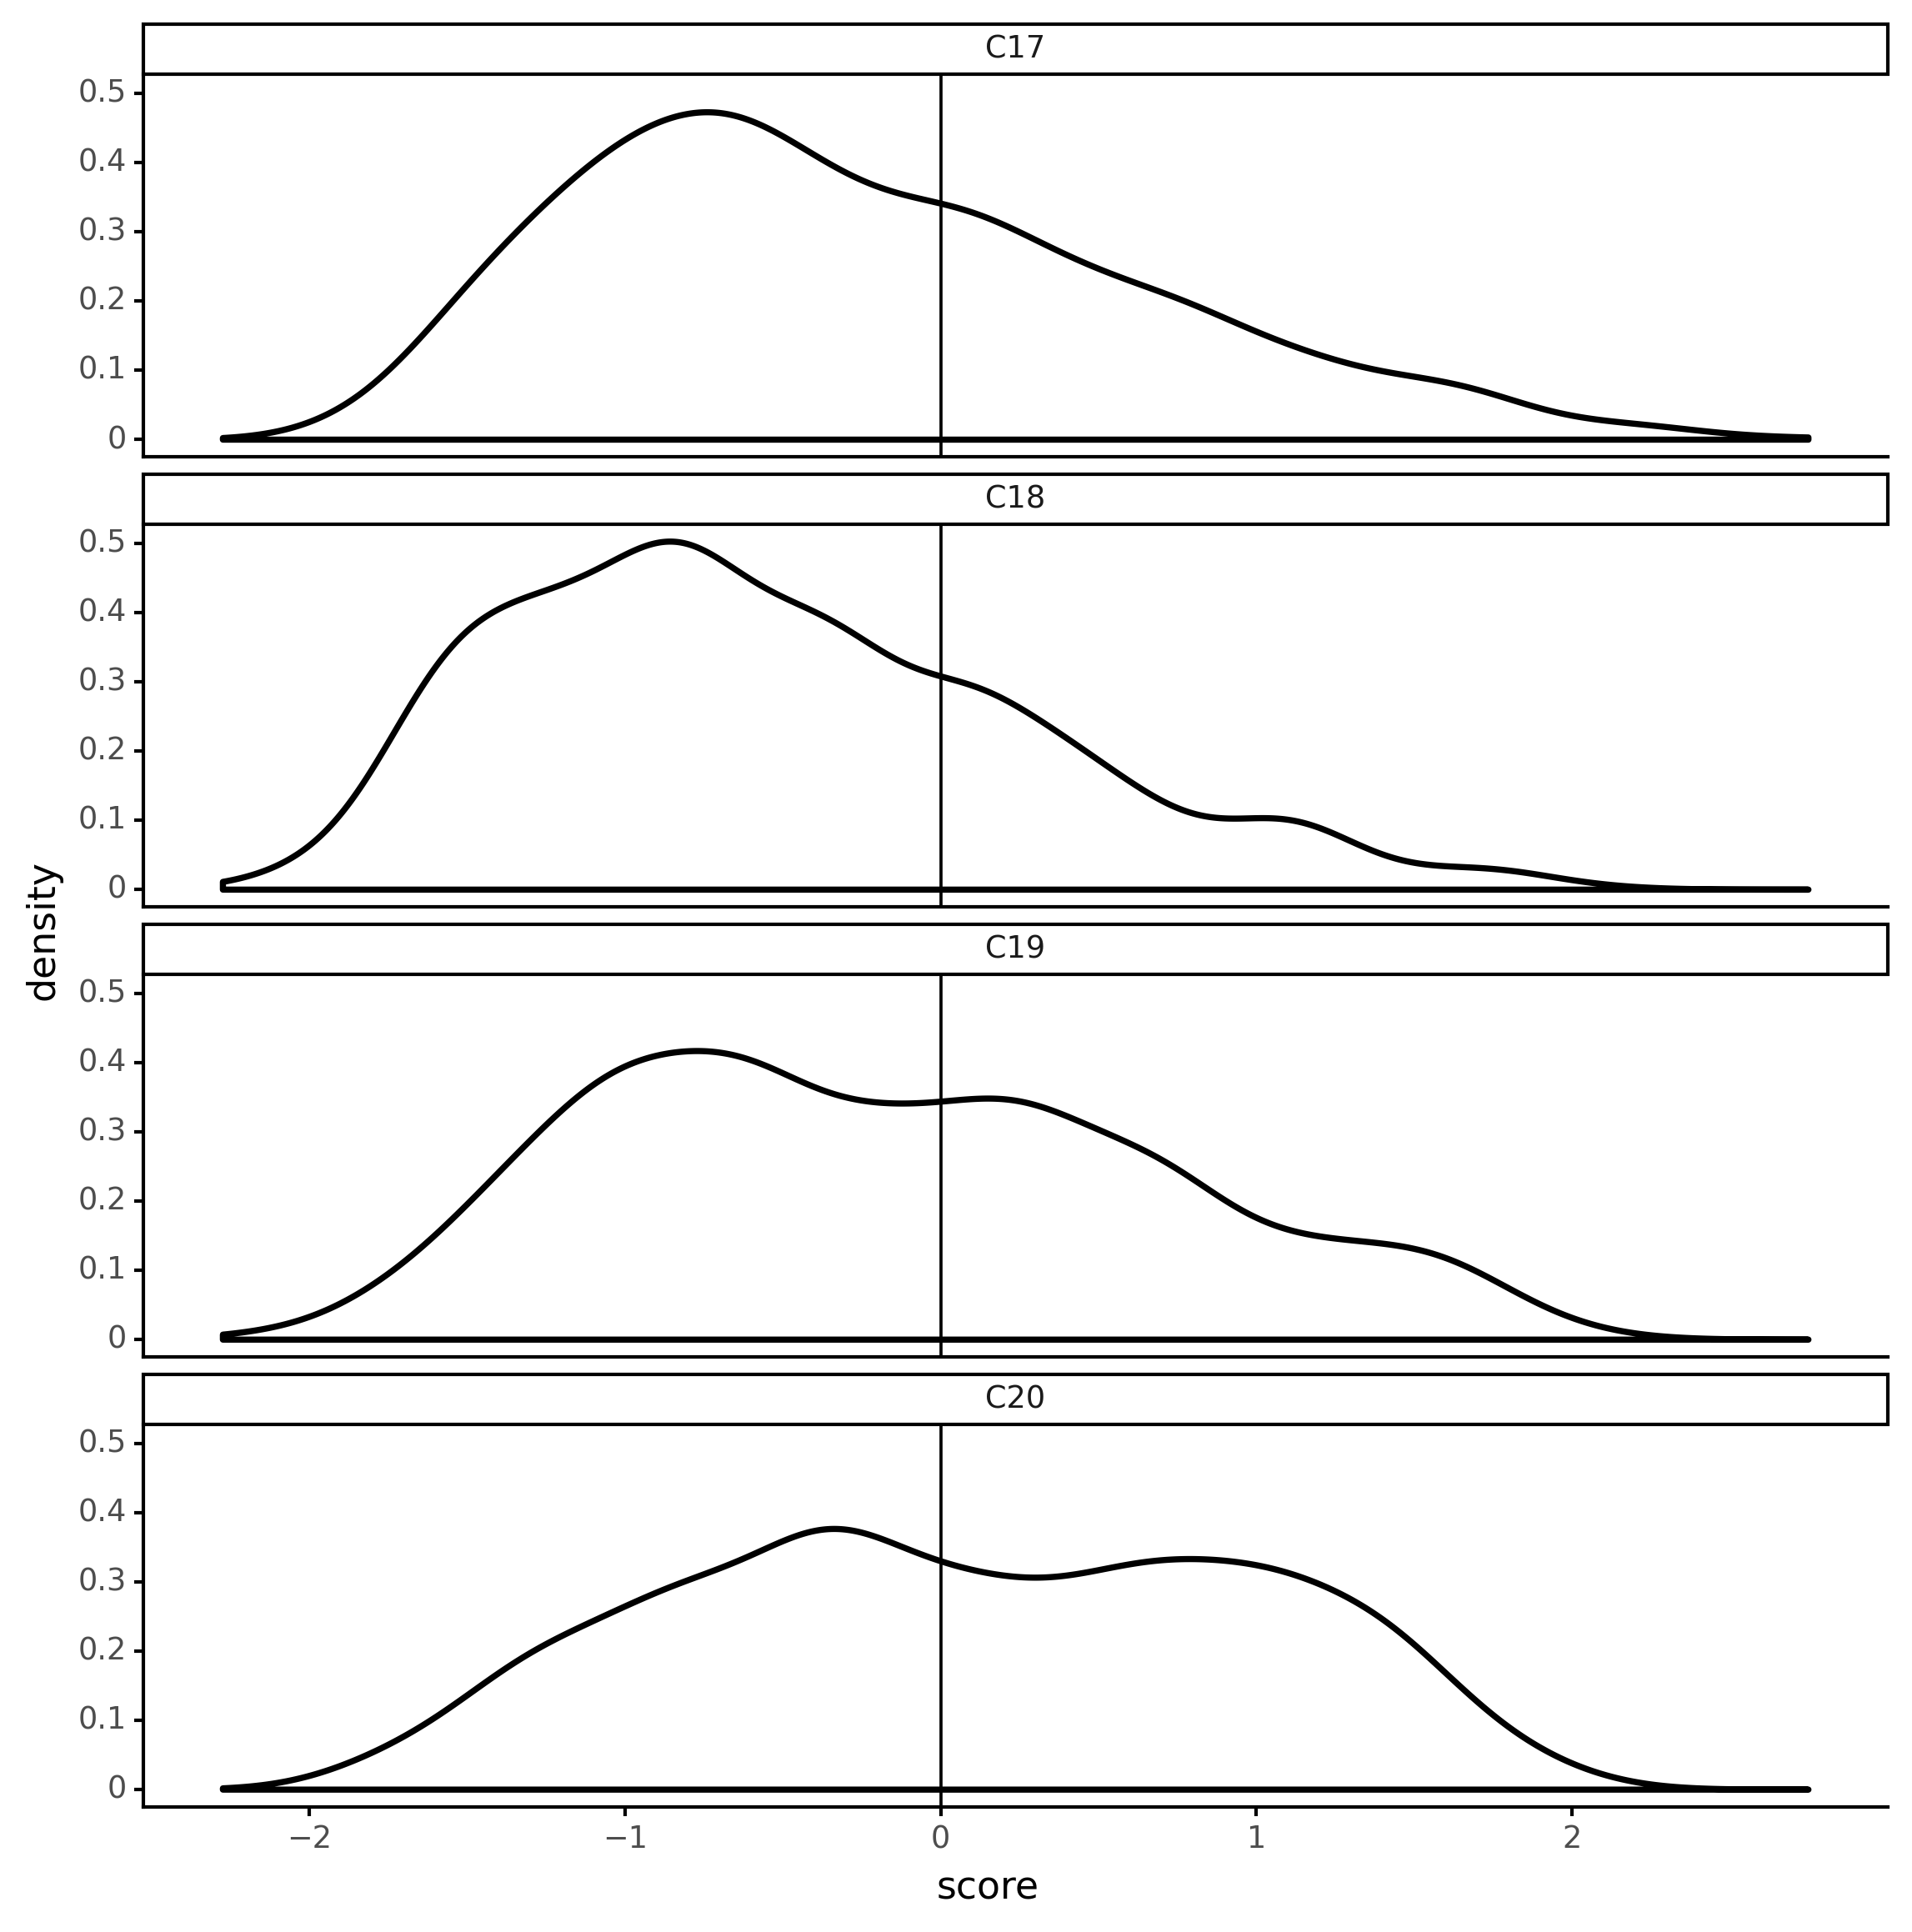

<ggplot: (8738604798661)>

In [11]:
fig=plot_mega_density_facet(dfq, x='score', n=1000, runs=1)
fig